In [5]:
# Importing required libraries

import yfinance as yf
import pandas as pd
from datetime import datetime

In [13]:
# Stock data

df_rel = yf.download("RELIANCE.NS", start="2020-01-01", end="2023-02-03")
df_rel = df_rel.round(2)

[*********************100%***********************]  1 of 1 completed


In [14]:
# sorting data by date

df_rel.sort_values(by ='Date', ascending = False).head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-02-02,2318.00,2348.00,2311.00,2326.95,2326.95,6305317
2023-02-01,2379.95,2379.95,2305.00,2339.90,2339.90,8929007
2023-01-31,2382.00,2387.65,2341.00,2353.85,2353.85,10472167
2023-01-30,2331.70,2371.90,2301.00,2359.75,2359.75,10047822
2023-01-27,2384.40,2387.35,2311.65,2337.35,2337.35,11920991


#### Plotting

<AxesSubplot:xlabel='Date'>

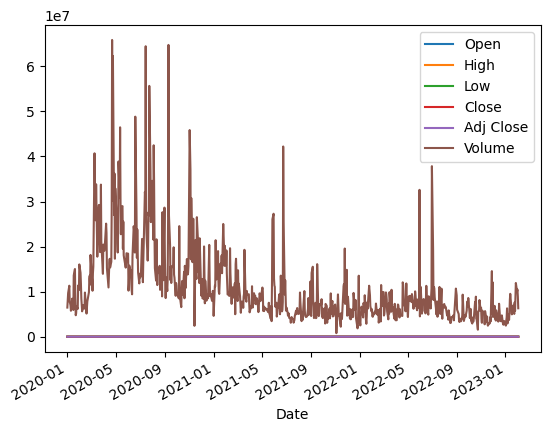

In [15]:
df_rel.plot()

#### Plotting day's high

<AxesSubplot:xlabel='Date'>

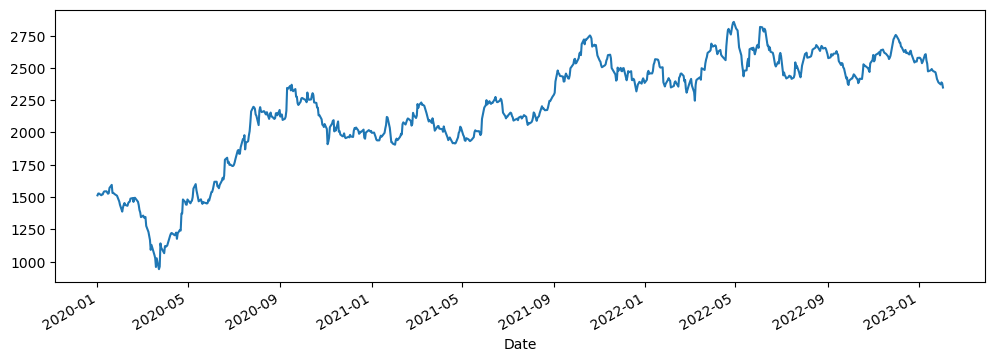

In [16]:
df_rel['High'].plot(figsize=(12,4))

#### Plotting day's high value with x-limit and y-limit

<AxesSubplot:xlabel='Date'>

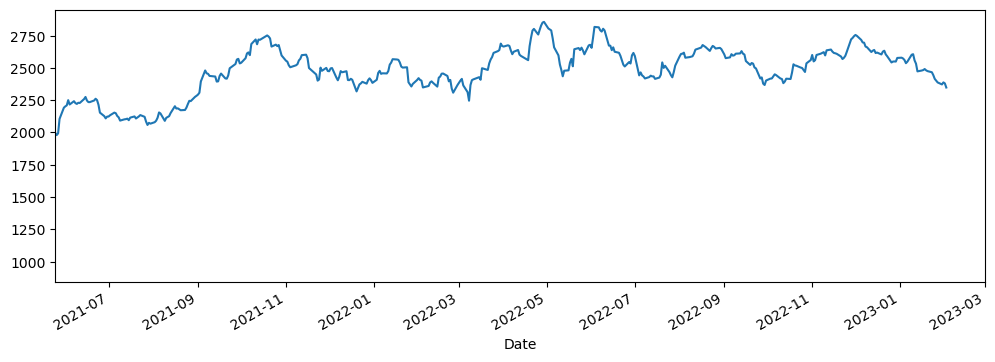

In [17]:
# xlim

df_rel['High'].plot(xlim=['2021-05-25','2023-03-01'],figsize=(12,4))

<AxesSubplot:xlabel='Date'>

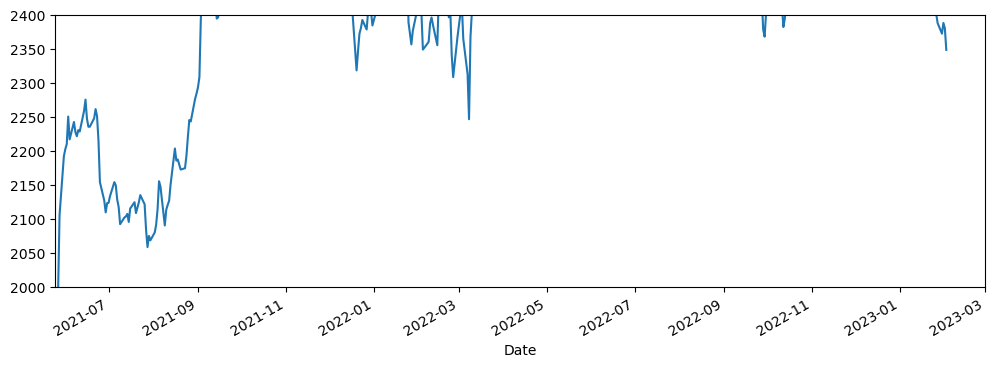

In [19]:
# Applying ylim

df_rel['High'].plot(xlim=['2021-05-25','2023-03-01'], ylim=[2000,2400],figsize=(12,4))

#### Applying color

<AxesSubplot:xlabel='Date'>

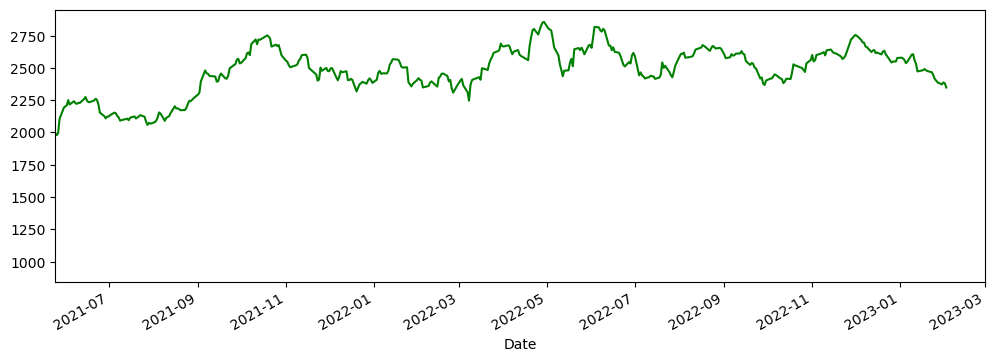

In [20]:
df_rel['High'].plot(xlim=['2021-05-25','2023-03-01'],figsize=(12,4), c='green')

In [21]:
# Index of dataframe

df_rel.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-06',
               '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10',
               '2020-01-13', '2020-01-14',
               ...
               '2023-01-19', '2023-01-20', '2023-01-23', '2023-01-24',
               '2023-01-25', '2023-01-27', '2023-01-30', '2023-01-31',
               '2023-02-01', '2023-02-02'],
              dtype='datetime64[ns]', name='Date', length=770, freq=None)

In [22]:
# Getting date index with respect to specific interval

index = df_rel.loc['2020-01-01':'2023-02-10'].index
index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-06',
               '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10',
               '2020-01-13', '2020-01-14',
               ...
               '2023-01-19', '2023-01-20', '2023-01-23', '2023-01-24',
               '2023-01-25', '2023-01-27', '2023-01-30', '2023-01-31',
               '2023-02-01', '2023-02-02'],
              dtype='datetime64[ns]', name='Date', length=770, freq=None)

In [23]:
# Getting Open price with respect to specific interval

share_open = df_rel.loc['2020-01-01':'2023-02-10']['Open']
share_open

Date
2020-01-01    1503.75
2020-01-02    1497.80
2020-01-03    1518.61
2020-01-06    1505.73
2020-01-07    1504.74
               ...   
2023-01-27    2384.40
2023-01-30    2331.70
2023-01-31    2382.00
2023-02-01    2379.95
2023-02-02    2318.00
Name: Open, Length: 770, dtype: float64

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

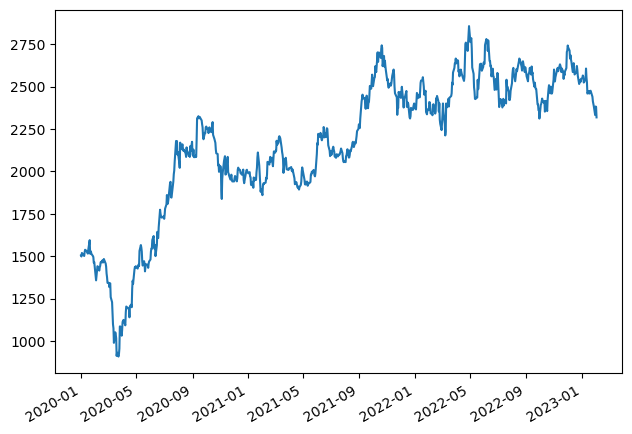

In [25]:
## Plotting open price


figure, axis = plt.subplots()
# Preventing over lapping
plt.tight_layout()
figure.autofmt_xdate()
axis.plot(index, share_open)

#### Working with Date index  : Example

In [26]:
df_rel = df_rel.reset_index()

In [27]:
df_rel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770 entries, 0 to 769
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       770 non-null    datetime64[ns]
 1   Open       770 non-null    float64       
 2   High       770 non-null    float64       
 3   Low        770 non-null    float64       
 4   Close      770 non-null    float64       
 5   Adj Close  770 non-null    float64       
 6   Volume     770 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 42.2 KB


In [28]:
## Setting 'Date' column as index and dropping it simulteneously

df_rel = df_rel.set_index('Date', drop=True)

In [29]:
df_rel.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01,1503.75,1512.76,1491.36,1495.42,1480.60,6463060
2020-01-02,1497.80,1526.48,1497.80,1520.88,1505.80,8173308
2020-01-03,1518.61,1527.17,1508.70,1522.72,1507.62,9684434
2020-01-06,1505.73,1513.55,1483.93,1487.40,1472.65,11315596
2020-01-07,1504.74,1520.09,1499.29,1510.28,1495.31,7699489


### Time resampling

In [30]:
df_rel.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01,1503.75,1512.76,1491.36,1495.42,1480.60,6463060
2020-01-02,1497.80,1526.48,1497.80,1520.88,1505.80,8173308
2020-01-03,1518.61,1527.17,1508.70,1522.72,1507.62,9684434
2020-01-06,1505.73,1513.55,1483.93,1487.40,1472.65,11315596
2020-01-07,1504.74,1520.09,1499.29,1510.28,1495.31,7699489


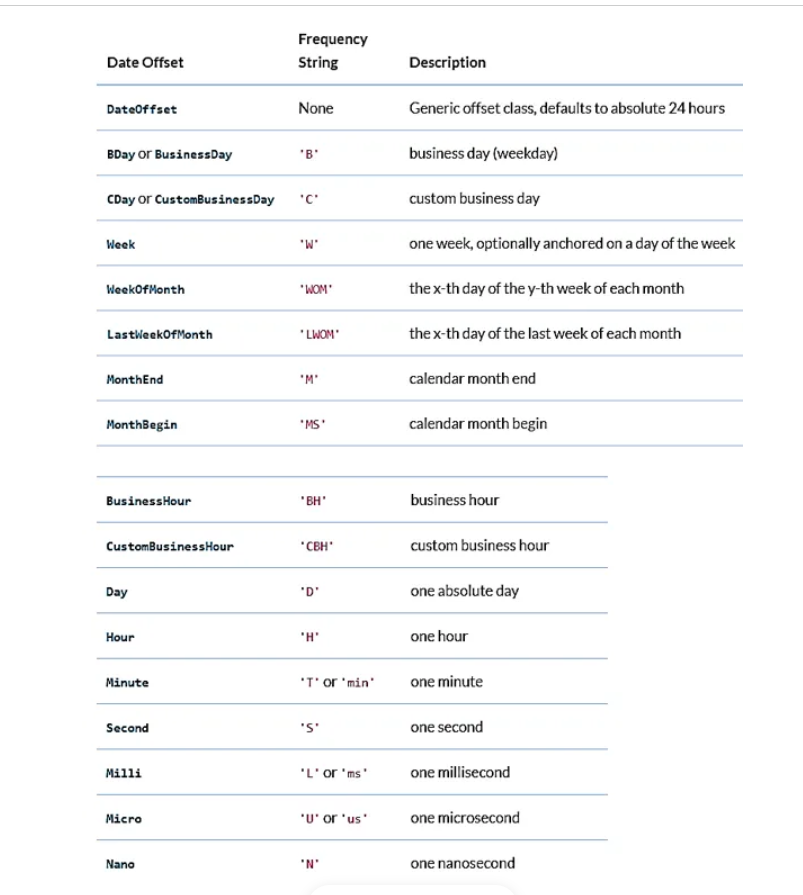

In [32]:
## Rules

from IPython import display
display.Image("Screenshot_48.png")

In [33]:
# Getting min value with respect every column of the year

df_rel.resample(rule='A').min()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-31,907.6,941.08,867.43,875.75,867.06,2411900
2021-12-31,1859.4,1905.00,1830.00,1841.95,1830.53,787160
2022-12-31,2211.5,2246.00,2180.00,2235.50,2228.79,1555270
2023-12-31,2318.0,2348.00,2301.00,2326.95,2326.95,2453414


In [34]:
# Getting min value with respect every column of the year

df_rel.resample(rule='A').max()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-31,2325.00,2369.35,2310.55,2324.55,2310.14,65848350
2021-12-31,2742.75,2751.35,2708.00,2731.85,2723.65,42209687
2022-12-31,2856.15,2856.15,2786.10,2819.85,2811.39,37841671
2023-12-31,2606.00,2606.00,2548.20,2596.80,2596.80,11920991


In [35]:
type(df_rel.resample(rule='A').max())

pandas.core.frame.DataFrame

<AxesSubplot:xlabel='Date'>

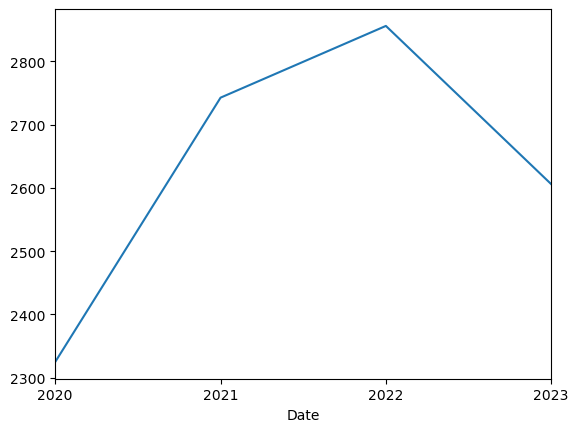

In [36]:
# year end frequency

df_rel.resample(rule='A').max()['Open'].plot()

In [37]:
df_rel.resample(rule='A').max()['Open']

Date
2020-12-31    2325.00
2021-12-31    2742.75
2022-12-31    2856.15
2023-12-31    2606.00
Freq: A-DEC, Name: Open, dtype: float64

In [38]:
# Quarterly start frequency

df_rel.resample(rule='QS').max()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01,1593.89,1593.89,1538.62,1566.15,1550.62,40698294
2020-04-01,1773.40,1804.20,1735.00,1759.40,1741.95,65848350
2020-07-01,2325.00,2369.35,2310.55,2324.55,2310.14,64750460
2020-10-01,2290.00,2309.00,2268.50,2287.50,2273.32,45857806
2021-01-01,2207.00,2231.90,2170.25,2202.10,2188.45,25016570
2021-04-01,2261.00,2274.90,2240.30,2250.00,2243.25,42209687
2021-07-01,2570.00,2570.00,2520.05,2548.05,2540.40,16098099
2021-10-01,2742.75,2751.35,2708.00,2731.85,2723.65,19568487
2022-01-01,2664.95,2688.00,2628.60,2672.95,2664.93,11466725


<AxesSubplot:xlabel='Date'>

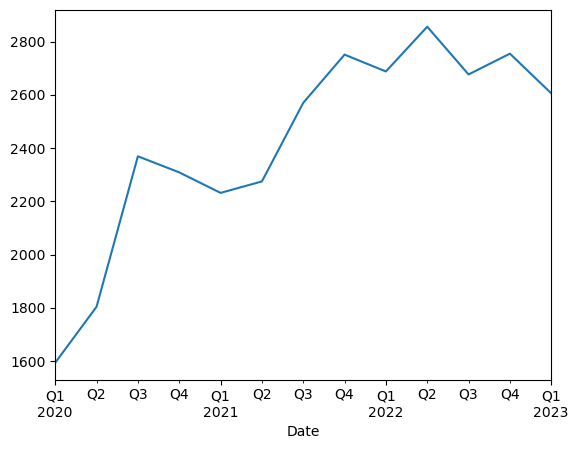

In [39]:
df_rel.resample(rule='QS').max()['High'].plot()

In [40]:
# Business End Frequency

df_rel.resample(rule='BA').max()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-31,2325.00,2369.35,2310.55,2324.55,2310.14,65848350
2021-12-31,2742.75,2751.35,2708.00,2731.85,2723.65,42209687
2022-12-30,2856.15,2856.15,2786.10,2819.85,2811.39,37841671
2023-12-29,2606.00,2606.00,2548.20,2596.80,2596.80,11920991


<AxesSubplot:xlabel='Date'>

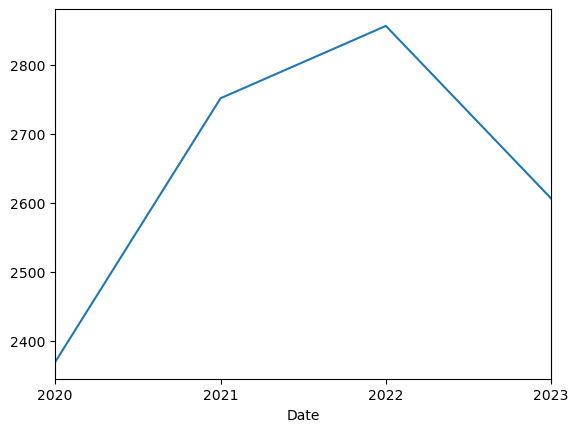

In [41]:
df_rel.resample(rule='BA').max()['High'].plot()

In [42]:
# Business Quarters

df_rel.resample(rule='BQS').max()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01,1593.89,1593.89,1538.62,1566.15,1550.62,40698294
2020-04-01,1773.40,1804.20,1735.00,1759.40,1741.95,65848350
2020-07-01,2325.00,2369.35,2310.55,2324.55,2310.14,64750460
2020-10-01,2290.00,2309.00,2268.50,2287.50,2273.32,45857806
2021-01-01,2207.00,2231.90,2170.25,2202.10,2188.45,25016570
2021-04-01,2261.00,2274.90,2240.30,2250.00,2243.25,42209687
2021-07-01,2570.00,2570.00,2520.05,2548.05,2540.40,16098099
2021-10-01,2742.75,2751.35,2708.00,2731.85,2723.65,19568487
2022-01-03,2664.95,2688.00,2628.60,2672.95,2664.93,11466725


<AxesSubplot:xlabel='Date'>

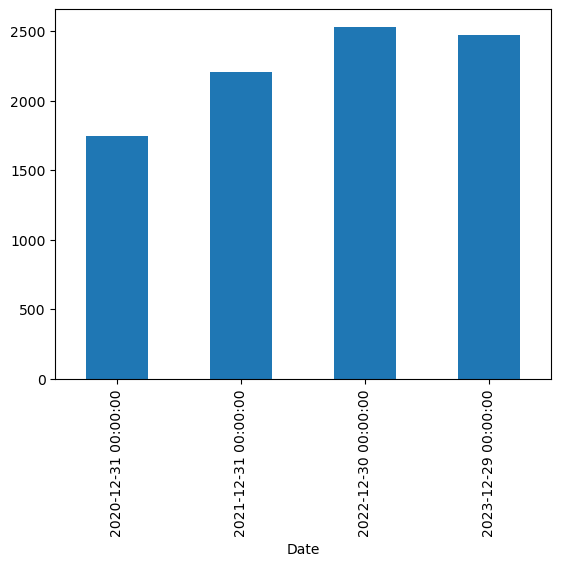

In [43]:
## Plotting


df_rel['Open'].resample(rule='BA').mean().plot(kind='bar')

In [44]:
# monthly mean data

df_rel['Open'].resample(rule='M').mean()

Date
2020-01-31    1511.134783
2020-02-29    1429.177368
2020-03-31    1094.299048
2020-04-30    1253.451111
2020-05-31    1466.833158
2020-06-30    1625.054545
2020-07-31    1933.252174
2020-08-31    2118.407143
2020-09-30    2213.488636
2020-10-31    2175.769048
2020-11-30    1986.697500
2020-12-31    1980.765909
2021-01-31    1968.000000
2021-02-28    2004.052500
2021-03-31    2103.830952
2021-04-30    1963.384211
2021-05-31    1967.050000
2021-06-30    2195.668182
2021-07-31    2099.985714
2021-08-31    2148.411905
2021-09-30    2419.857143
2021-10-31    2639.190000
2021-11-30    2487.617500
2021-12-31    2397.091304
2022-01-31    2450.057500
2022-02-28    2367.040000
2022-03-31    2442.464286
2022-04-30    2662.026316
2022-05-31    2572.945238
2022-06-30    2624.993182
2022-07-31    2439.340476
2022-08-31    2606.610000
2022-09-30    2509.972727
2022-10-31    2433.555263
2022-11-30    2597.640476
2022-12-31    2611.440909
2023-01-31    2483.852381
2023-02-28    2348.975000
Freq: M

<AxesSubplot:xlabel='Date'>

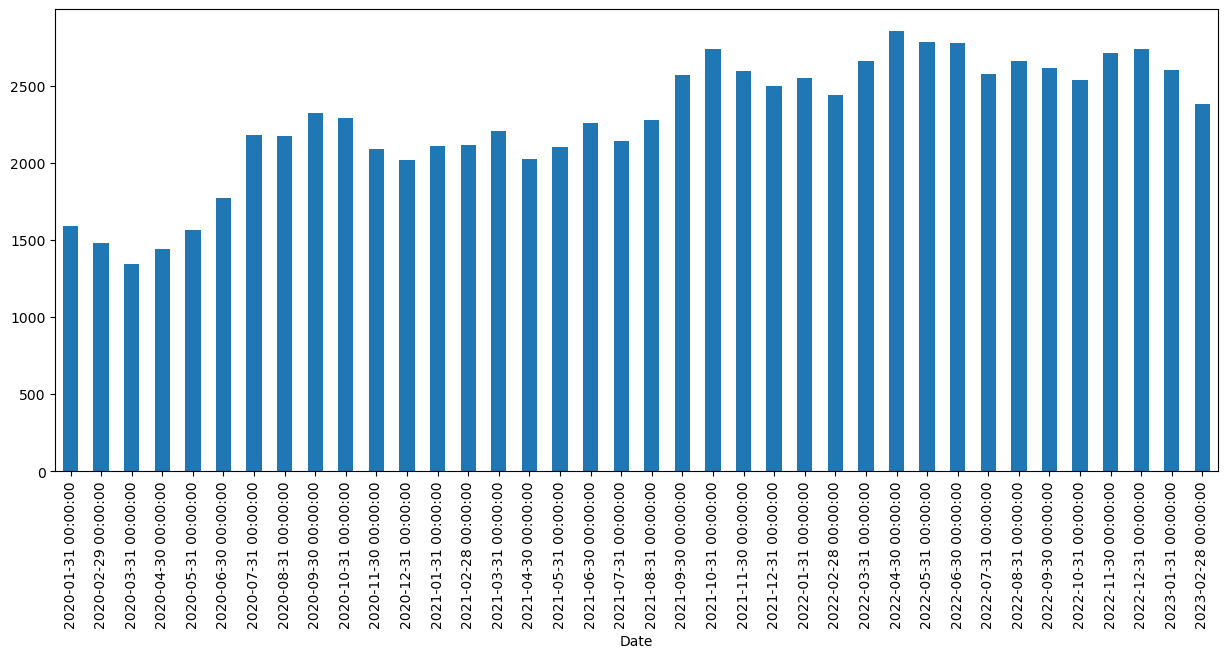

In [45]:
df_rel['Open'].resample(rule='M').max().plot(kind='bar', figsize=(15,6))

## Rolling

In [46]:
df_rel['High'].rolling(10).mean()

Date
2020-01-01         NaN
2020-01-02         NaN
2020-01-03         NaN
2020-01-06         NaN
2020-01-07         NaN
                ...   
2023-01-27    2459.470
2023-01-30    2449.370
2023-01-31    2440.170
2023-02-01    2429.865
2023-02-02    2415.555
Name: High, Length: 770, dtype: float64

In [47]:
# Calculating max from 5th value
# rolling --> window

df_rel['High'].rolling(5).max().head(20)

Date
2020-01-01        NaN
2020-01-02        NaN
2020-01-03        NaN
2020-01-06        NaN
2020-01-07    1527.17
2020-01-08    1527.17
2020-01-09    1535.45
2020-01-10    1543.32
2020-01-13    1544.06
2020-01-14    1544.06
2020-01-15    1544.06
2020-01-16    1544.06
2020-01-17    1570.07
2020-01-20    1593.89
2020-01-21    1593.89
2020-01-22    1593.89
2020-01-23    1593.89
2020-01-24    1593.89
2020-01-27    1532.23
2020-01-28    1532.23
Name: High, dtype: float64

In [48]:
Report :
    After 10 rows it is considering 

SyntaxError: invalid syntax (4308443.py, line 1)

In [49]:
df_rel

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01,1503.75,1512.76,1491.36,1495.42,1480.60,6463060
2020-01-02,1497.80,1526.48,1497.80,1520.88,1505.80,8173308
2020-01-03,1518.61,1527.17,1508.70,1522.72,1507.62,9684434
2020-01-06,1505.73,1513.55,1483.93,1487.40,1472.65,11315596
2020-01-07,1504.74,1520.09,1499.29,1510.28,1495.31,7699489
...,...,...,...,...,...,...
2023-01-27,2384.40,2387.35,2311.65,2337.35,2337.35,11920991
2023-01-30,2331.70,2371.90,2301.00,2359.75,2359.75,10047822
2023-01-31,2382.00,2387.65,2341.00,2353.85,2353.85,10472167


In [50]:
df_rel['Open:30 days rolling'] = df_rel['Open'].rolling(30).mean()

In [51]:
df_rel.head(31)

,Open,High,Low,Close,Adj Close,Volume,Open:30 days rolling
Date,,,,,,,
2020-01-01,1503.75,1512.76,1491.36,1495.42,1480.60,6463060,NaN
2020-01-02,1497.80,1526.48,1497.80,1520.88,1505.80,8173308,NaN
2020-01-03,1518.61,1527.17,1508.70,1522.72,1507.62,9684434,NaN
2020-01-06,1505.73,1513.55,1483.93,1487.40,1472.65,11315596,NaN
2020-01-07,1504.74,1520.09,1499.29,1510.28,1495.31,7699489,NaN
2020-01-08,1500.77,1520.04,1495.82,1498.94,1484.08,7406104,NaN
2020-01-09,1524.15,1535.45,1516.87,1533.46,1518.26,6914533,NaN
2020-01-10,1537.33,1543.32,1525.19,1533.12,1517.91,5758760,NaN
2020-01-13,1530.54,1544.06,1523.95,1529.20,1514.04,8437316,NaN


<AxesSubplot:xlabel='Date'>

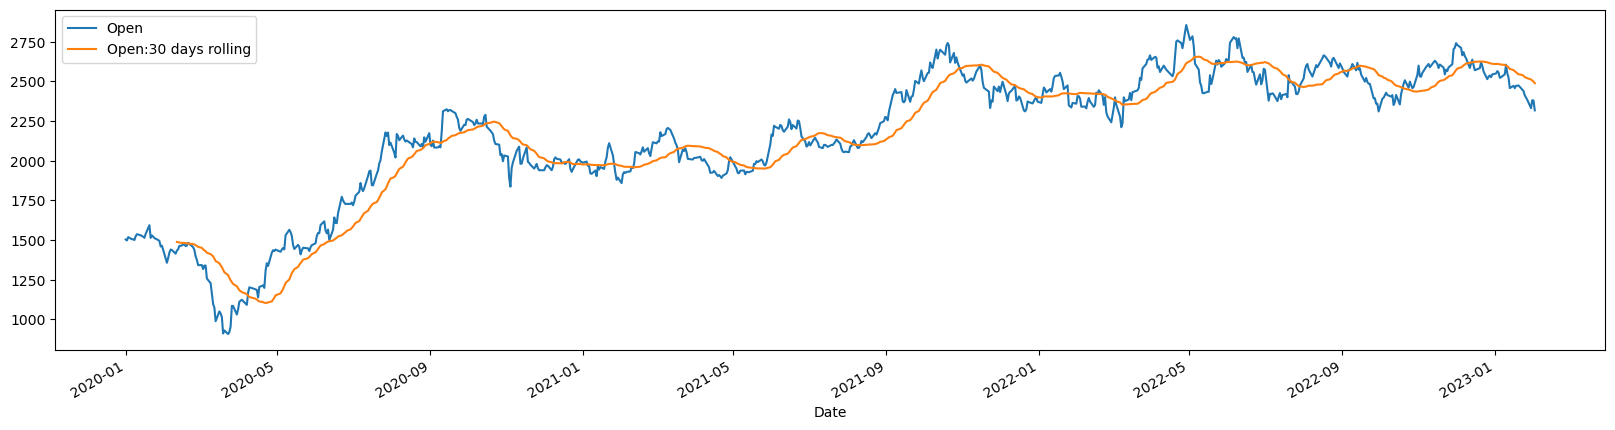

In [52]:
## Plotting 'Open', 'Open:30 days rolling'

df_rel[['Open', 'Open:30 days rolling']].plot(figsize=(20,5))

Stationary data gives very good result

### datetime

In [55]:
from datetime import datetime

In [56]:
# Creating a date

datetime(2023,3,4)

datetime.datetime(2023, 3, 4, 0, 0)

In [57]:
# Current date

datetime.now()

datetime.datetime(2023, 3, 5, 9, 3, 42, 970287)

In [58]:
date = datetime(2023,1,1)

In [59]:
# With hour and min

date

datetime.datetime(2023, 1, 1, 0, 0)

In [60]:
# date

date.date()

datetime.date(2023, 1, 1)

In [61]:
date.day

1

In [62]:
# nth day

date.weekday()

6

In [63]:
# year

date .year

2023

In [64]:
# month

date.month

1

In [65]:
## Creating a function for time operation

def add_num(num1, num2):
    return num1+num2

In [66]:
start_time = datetime.now()
num1 = 10
num2 = 20
for i in range(100):
    add_num(num1, num2)
end_time = datetime.now()
print(end_time-start_time)

0:00:00


1. Read the Microsoft Data using Pandas Data reader
2. Get the maximum price of the share from 2017 to 2022
3. Which is the date of the highest price of the stock?
4. Which is the date of the lowest price of the stock?